### Data Analysis of Itolizuma drug in Covid cases<a id='main'>

### Import Libraries<a id='imports'>

In [2]:
%matplotlib inline
#
# data manipulation and math
#
import numpy as np
import scipy as sp
import pandas as pd
#
# plotting and visualization
#
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
import seaborn as sns
#

print("Loaded Libraries")
import warnings
warnings.filterwarnings('ignore')

Loaded Libraries


### Load Data<a id='load_data'>

In [28]:
df = pd.read_csv('ito_demographics_data.csv', parse_dates=['admission_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   s_no               13 non-null     int64         
 1   admission_date     13 non-null     datetime64[ns]
 2   patient_num        13 non-null     object        
 3   age_yrs            13 non-null     int64         
 4   weight_kg          10 non-null     float64       
 5   gender             13 non-null     object        
 6   fever              4 non-null      object        
 7   cough              7 non-null      object        
 8   sob                13 non-null     object        
 9   weakness           7 non-null      object        
 10  appetite_loss      2 non-null      object        
 11  other_symptoms     4 non-null      object        
 12  diabetes_mellitus  8 non-null      object        
 13  hypertension       9 non-null      object        
 14  other_comorb

In [15]:
df['age_yrs'].describe()

count    13.000000
mean     66.692308
std      13.161716
min      36.000000
25%      58.000000
50%      69.000000
75%      76.000000
max      84.000000
Name: age_yrs, dtype: float64

In [16]:
df['weight_kg'].describe()

count    10.000000
mean     74.200000
std      11.487191
min      52.000000
25%      69.000000
50%      75.000000
75%      79.000000
max      95.000000
Name: weight_kg, dtype: float64

In [17]:
df['gender'].describe()

count     13
unique     2
top        M
freq      11
Name: gender, dtype: object

## Number of Missing values by column

In [18]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values('count', ascending=False)

,count,%
weight_kg,3,23.076923
s_no,0,0.000000
admission_date,0,0.000000
patient_num,0,0.000000
age_yrs,0,0.000000
gender,0,0.000000


In [6]:
df.head()

,s_no,admission_date,patient_num,age_yrs,weight_kg,gender
0,1,2021-01-07,P1,58,75.0,M
1,2,2021-01-07,P2,84,76.0,M
2,3,2021-01-14,P3,53,75.0,M
3,4,2021-01-09,P4,69,95.0,M
4,5,2020-11-20,P5,77,65.0,M


In [7]:
df.columns

Index(['s_no', 'admission_date', 'patient_num', 'age_yrs', 'weight_kg',
       'gender'],
      dtype='object')

### Plot distributions

<AxesSubplot:title={'center':'Age in Years'}, ylabel='Frequency'>

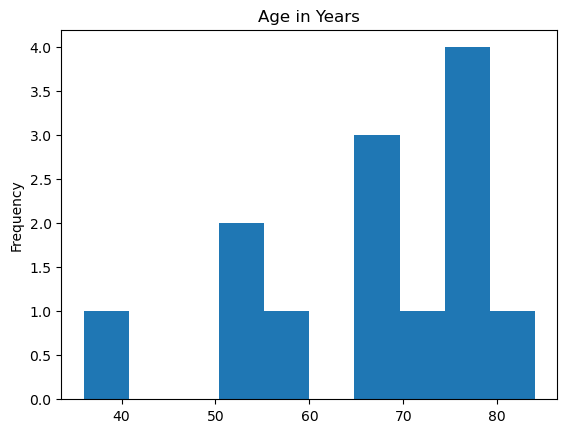

In [11]:
df['age_yrs'].plot(kind = 'hist', title = 'Age in Years')

<AxesSubplot:title={'center':'Weight in Kg'}, ylabel='Frequency'>

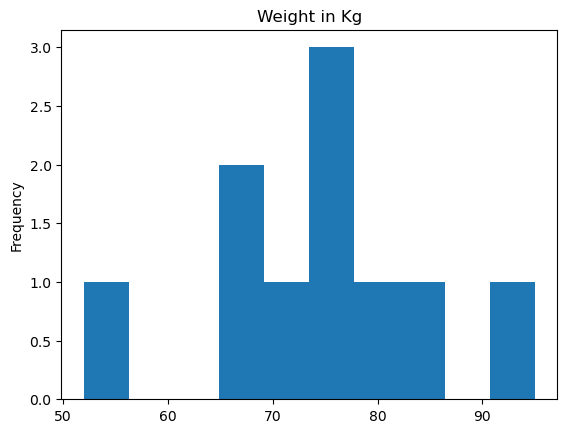

In [12]:
df['weight_kg'].plot(kind = 'hist', title = 'Weight in Kg')

In [13]:
df.gender.value_counts()

M    11
F     2
Name: gender, dtype: int64

In [27]:
df['gender'].value_counts(normalize=True)*100

M    84.615385
F    15.384615
Name: gender, dtype: float64

Text(0, 0.5, 'count')

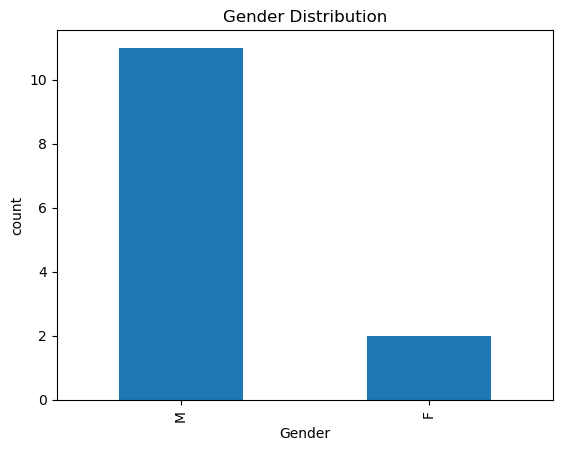

In [14]:
df['gender'].value_counts().plot(kind="bar")
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel("count")

In [31]:
df['fever'].value_counts()

Y    4
Name: fever, dtype: int64

In [32]:
df['cough'].value_counts()

Y    7
Name: cough, dtype: int64

In [33]:
df['sob'].value_counts()

Y - GRADE 4    7
Y              6
Name: sob, dtype: int64

In [36]:
df['weakness'].value_counts()

Y    7
Name: weakness, dtype: int64

In [38]:
df['other_symptoms'].value_counts()

Body pain                               1
Myalgia                                 1
Myalgia high grade fever with chills    1
High grade fever                        1
Name: other_symptoms, dtype: int64

In [49]:
df['other_comorbidity'].value_counts()

K/C/O Swine flu 2018 since then patient was on home oxygen therapy    1
Name: other_comorbidity, dtype: int64

<table>
    <caption><strong>Baseline Characetristics and demographics</strong></caption>
    <tr><th>&nbsp;</th><th>Variable(number/value)</th><th>Percentage</th></tr>
<tr><td>Total Number of patients</td><td>13</td><td>100</td></tr>
<tr><th>Age in years</th><th colspan="2">&nbsp;</th></tr>
<tr><td>Data Available</td><td>13</td><td>100</td></tr>
<tr><td>Mean <span>&#177;</span>SD</td><td>66.7<span>&#177;</span> 13</td><td>&nbsp;</td></tr>
<tr><td>Range (Min-Max) years</td><td>36 - 84</td><td>&nbsp;</td></tr>
<tr><th>Gender</th><th colspan="2">&nbsp;</th></tr>
<tr><td>Data Available</td><td>13</td><td>100</td></tr>
<tr><td>Male</td><td>11</td><td>85</td></tr>
<tr><td>Female</td><td>2</td><td>15</td></tr>
<tr><th>Weight in Kgs</th><th colspan="2">&nbsp;</th></tr>
<tr><td>Data Available</td><td>10</td><td>77</td></tr>
<tr><td>Mean <span>&#177;</span>SD</td><td>74<span>&#177;</span>11</td><td>&nbsp;</td></tr>
<tr><td>Range (Min-Max) kgs</td><td>52 - 95</td><td>&nbsp;</td></tr>
<tr><th>Symptoms and Comorbidities</th><th colspan="2">&nbsp;</th></tr>
<tr><th>Symptoms</th><th colspan="2">&nbsp;</th></tr>
<tr><td>Fever</td><td>4</td><td>30.77</td></tr>
<tr><td>Cough</td><td>7</td><td>53.85</td></tr>
<tr><td>Weakness</td><td>7</td><td>53.85</td></tr>
<tr><td>Appetite Loss</td><td>2</td><td>15.38</td></tr>
<tr><th>Other Symptoms</th><th>4</th><th>30.76</th></tr>
<tr><td>Body pain </td><td>1</td><td>7.69</td></tr>
<tr><td>Myalgia</td><td>1</td><td>7.69</td></tr>
<tr><td>Myalgia high grade fever with chills</td><td>1</td><td>7.69</td></tr>
<tr><td>High grade fever</td><td>1</td><td>7.69</td></tr>
<tr><th>Shortness of breath</th><th colspan="2">&nbsp;</th></tr>
<tr><td>Data Available</td><td>13</td><td>100</td></tr>
<tr><td>Y</td><td>6</td><td>46.15</td></tr>
<tr><td>Y- GRADE 4</td><td>7</td><td>53.84</td></tr>
<tr><th>Comorbidities</th><th colspan="2">&nbsp;</th></tr>
    <tr><td>Diabetes Melitus</td><td>8</td><td>61.5</td></tr>
    <tr><td>Hypertension</td><td>9</td><td>69.2</td></tr>
    <tr><td>Other Comobidities</td><td>1</td><td>7.69</td></tr>
</table>